In [7]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [275]:
#managing directories
import os

path = os.getcwd()
os.chdir('....')

D:\ML assignments\machine-learning-ex1
D:\ML assignments\machine-learning-ex1


In [17]:
#importing data 
data = pd.read_csv("ex1data1.txt")

In [18]:
#intialising parameters
matrix = np.array(data.values,'float')
X = matrix[:,0]
y = matrix[:,1]
X = X.reshape([97,1])
y = y.reshape([97,1])
#number of training exapmples
m = len(y)
#adding column of ones to features
x = np.hstack([np.ones_like(X),X])
x1 = x[:,0]
x1 = x1.reshape([97,1])
x2 = x[:,1]
x2 = x2.reshape([97,1])

Text(0.5, 1.0, 'Scatter plot for training data')

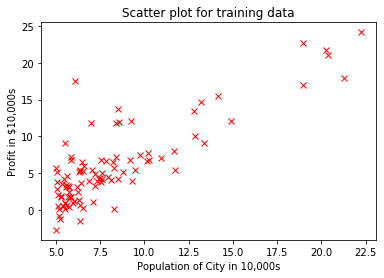

In [249]:
#potting the training data
plt.plot(X,y,'rx')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.title('Scatter plot for training data')

In [250]:
#ComputeCost
def ComputeCost(x,y,theta):
    h = x@theta
    a = 1/(2*m)
    b = np.sum(np.square(np.subtract(h,y)))
    J = a * b
    return(J)

In [251]:
#gradient descend algorithm
def gradient(x,y,theta,alpha,iteration):

    J_history = np.zeros([iteration, 1]);
    for i in range(0,iteration):
        
        error = (x @ theta) - y
        temp0 = theta[0,0] - ((alpha/m) * np.sum(error))
        temp1 = theta[1,0] - ((alpha/m) * np.sum(np.multiply(error,x2)))
        theta = np.array([temp0,temp1]).reshape(2,1)
#storing cost value for each iteration 
        J_history[i] = ComputeCost(x,y,theta)   
    return (theta, J_history)

In [276]:
#intialize theta and cost
theta = np.array([[0], [0]])
print(ComputeCost(x,y,theta))

32.072733877455676


In [277]:
iterations = 1400
alpha = 0.01
theta,J = gradient(x,y,theta,alpha,iterations)
theta

array([[-3.57779807],
       [ 1.16108882]])

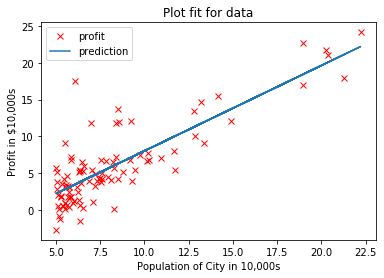

In [272]:
#plotting the fit for data 
plt.plot(X,y,'rx')
plt.plot(X,x@theta,'-')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.title('Plot fit for data')
plt.legend(['profit','prediction'])

Text(0.5, 1.0, 'Cost vs Iterations')

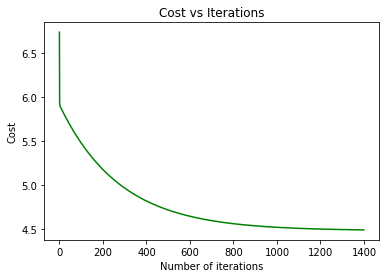

In [278]:
#cost vs iterations
iterations = np.arange(0,1400,1)
iterations = iterations.reshape([1400,1])
plt.plot(iterations,J,'g-')
plt.ylabel('Cost')
plt.xlabel('Number of iterations')
plt.title('Cost vs Iterations')